In [93]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline


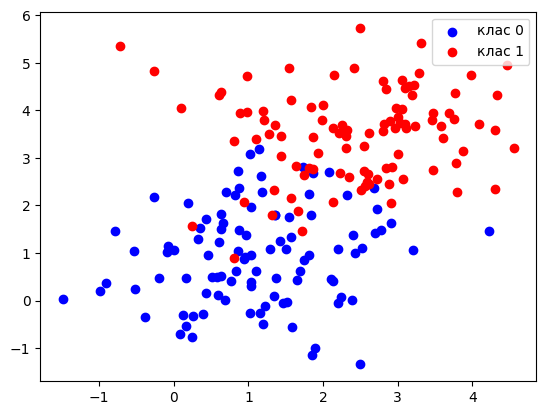

In [94]:
data_2d = pd.read_csv("data/data_2d.csv")

data_2d.columns = ["class", "x_1", "x_2"]

cat_0 = data_2d[data_2d["class"] == 0]
cat_1 = data_2d[data_2d["class"] == 1]

plt.scatter(cat_0["x_1"], cat_0["x_2"], c="blue", label="клас 0")
plt.scatter(cat_1["x_1"], cat_1["x_2"], c="red", label="клас 1")


plt.legend()

plt.show()

C:\Users\Anton\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anton\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anton\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anton\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

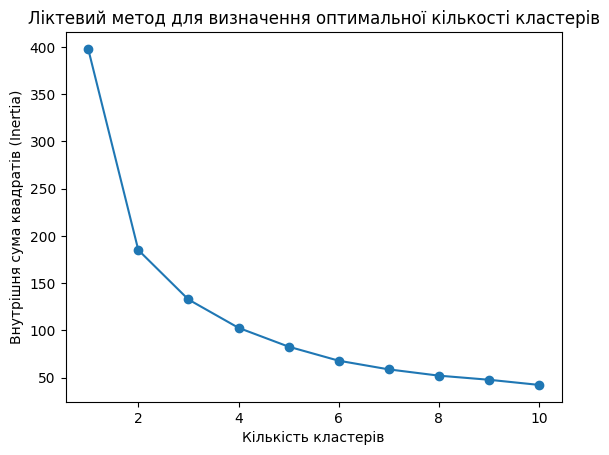

In [95]:
X = data_2d[["x_1", "x_2"]]



# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Знаходження оптимальної кількості кластерів за допомогою ліктевого методу
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Візуалізація ліктевого методу
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Кількість кластерів")
plt.ylabel("Внутрішня сума квадратів (Inertia)")
plt.title("Ліктевий метод для визначення оптимальної кількості кластерів")
plt.show()

C:\Users\Anton\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


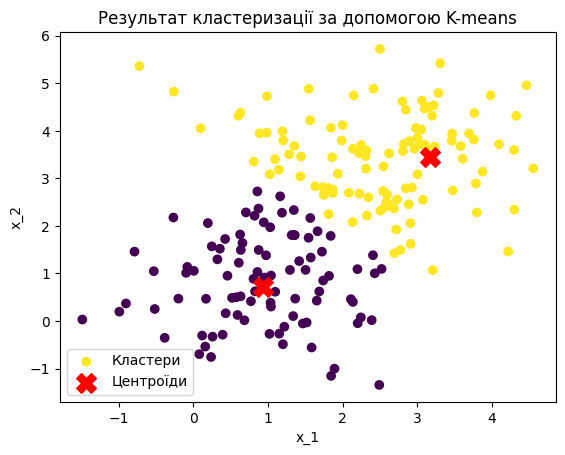

In [96]:
# Застосування K-means з оптимальною кількістю кластерів
optimal_k = 2  # З візуалізації ліктевого методу обираємо оптимальне k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_2d["cluster"] = kmeans.fit_predict(X_scaled)

# Візуалізація результатів кластеризації
plt.scatter(
    data_2d["x_1"],
    data_2d["x_2"],
    c=data_2d["cluster"],
    cmap="viridis",
    label="Кластери",
)
plt.scatter(
    *scaler.inverse_transform(kmeans.cluster_centers_[:, :2].T),
    marker="X",
    s=200,
    c="red",
    label="Центроїди",
)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Результат кластеризації за допомогою K-means")
plt.legend()
plt.show()

In [97]:
mnist = pd.read_csv("data/mnist.csv", header=None)
mnist.pivot_table(index=[0], aggfunc="size")

0
0    42
1    67
2    55
3    45
4    55
5    50
6    43
7    49
8    40
9    54
dtype: int64

тут показано скільки разів у датасеті Mnist повторюється кожна цифра (кожний рядок це розгорнутий квадрат 28х28 пікселів, перший стовпчик це клас - яка цифра зображена)  

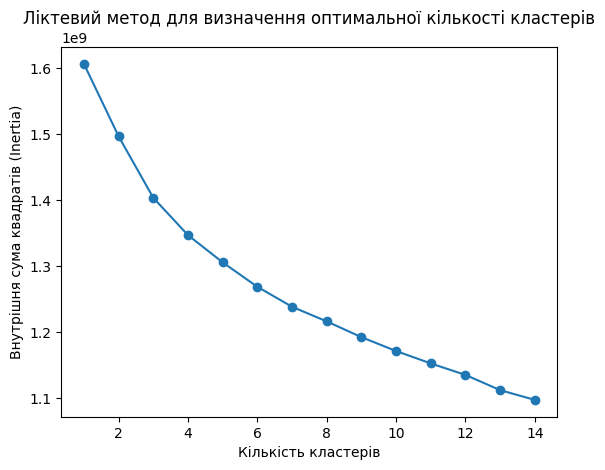

In [103]:
X_mnist = mnist.iloc[:, 1:]
# Знаходження оптимальної кількості кластерів за допомогою ліктевого методу
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_mnist)
    inertia.append(kmeans.inertia_)

# Візуалізація ліктевого методу
plt.plot(range(1, 15), inertia, marker="o")
plt.xlabel("Кількість кластерів")
plt.ylabel("Внутрішня сума квадратів (Inertia)")
plt.title("Ліктевий метод для визначення оптимальної кількості кластерів")
plt.show()

Ми знаємо що класів 10, але локтевий метод цього не показує. Спробуємо його після зменшення розмірності датасету.

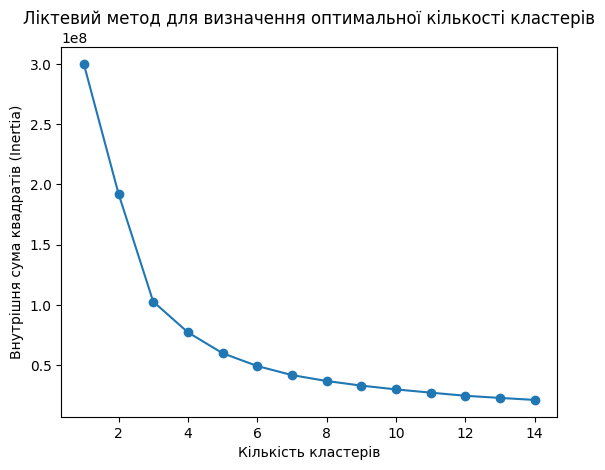

In [102]:
pca = PCA(n_components=2)
X_pca_mnist = pca.fit_transform(X_mnist)

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_mnist)
    inertia.append(kmeans.inertia_)

# Візуалізація ліктевого методу
plt.plot(range(1, 15), inertia, marker="o")
plt.xlabel("Кількість кластерів")
plt.ylabel("Внутрішня сума квадратів (Inertia)")
plt.title("Ліктевий метод для визначення оптимальної кількості кластерів")
plt.show()

C:\Users\Anton\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


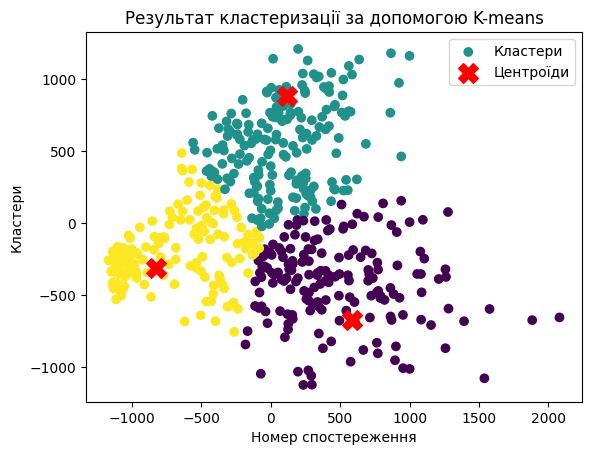

In [105]:
# Застосування K-means з оптимальною кількістю кластерів
optimal_k = 3  # З візуалізації ліктевого методу обираємо оптимальне k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca_mnist[:, :2])

X_pca_mnist_with_clusters = np.column_stack(
    (
        cluster_labels,
        X_pca_mnist,
    )
)
result_df = pd.DataFrame(X_pca_mnist_with_clusters, columns=["cluster", "f_1", "f_2"])
# Візуалізація результатів кластеризації
plt.scatter(
    result_df["f_1"],
    result_df["f_2"],  # Останній стовпець - кластери
    cmap="viridis",
    c=result_df["cluster"],
    label="Кластери",
)
centroid_features = scaler.inverse_transform(kmeans.cluster_centers_[:, :2])
plt.scatter(
    centroid_features[:, 0],
    centroid_features[:, 1],
    marker="X",
    s=200,
    c="red",
    label="Центроїди",
)
plt.xlabel("Номер спостереження")
plt.ylabel("Кластери")
plt.title("Результат кластеризації за допомогою K-means")
plt.legend()
plt.show()